<a href="https://colab.research.google.com/github/HongEnJung/Kaggle/blob/main/House%20Prices/House_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
- 데이터에서 중요한 컬럼
1. SalePrice: 주택의 판매 가격, 이 컬럼은 예측하려는 타겟 변수
2. OverallQual: 주택 전반적인 자질에 대한 평가 점수, 이 컬럼은 1부터 10까지의 값으로 이루어져 있으며, 높은 값일수록 더 좋은 자질을 가진 주택
3. GrLivArea: 지상 생활 면적, 이 컬럼은 평방 피트 단위로 이루어져 있으며, 주택의 크기를 나타내는 중요한 변수 중 하나
4. YearBuilt: 주택 건축 년도, 이 컬럼은 주택의 연식을 나타내는 중요한 변수 중 하나
5. GarageCars: 차고에 수용 가능한 차량 수, 이 컬럼은 차고의 크기와 관련이 있으며, 차량 수가 많을수록 주택의 가치가 높아질 가능성이 있음
6. Neighborhood: Ames의 지역 이름, 이 컬럼은 지역에 따른 부동산 시장의 차이를 고려할 때 중요한 변수 중 하나
```



In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#matplotlib inline

In [88]:
df_train = pd.read_csv("/content/drive/MyDrive/House Prices/train.csv")

In [89]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [90]:
# First things first: analysing 'SalePrice'

In [91]:
# 주택가격
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

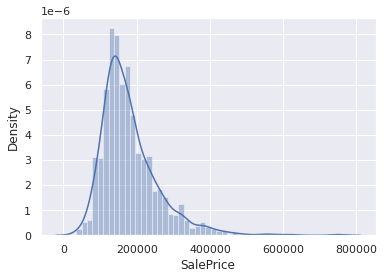

In [92]:
# 히스토그램
sns.distplot(df_train['SalePrice'])

In [93]:
# 왜도 계산 (분포가 대칭인지 비대칭인지)
# 대칭 분포인 경우 0, 왼쪽으로 치우친 경우 음수, 오른쪽으로 치우친 경우 양수
print('Skewness: %f' % df_train['SalePrice'].skew())

# 첨도 계산
# 분포의 꼬리 부분의 두께
# 정규분포와 같은 경우 3, 작으면 분포가 납작, 크면 분포가 뾰족
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

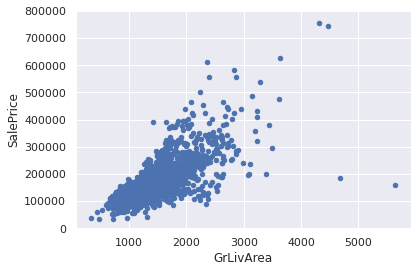

In [94]:
# GrLivArea: 지상 생활 면적, SalePrice: 주택의 판매 가격의 산점도
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

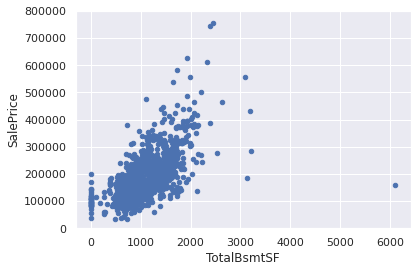

In [95]:
# TotalBsmtSF:지하실 총 면적,SalePrice: 주택의 판매 가격의 산점도
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

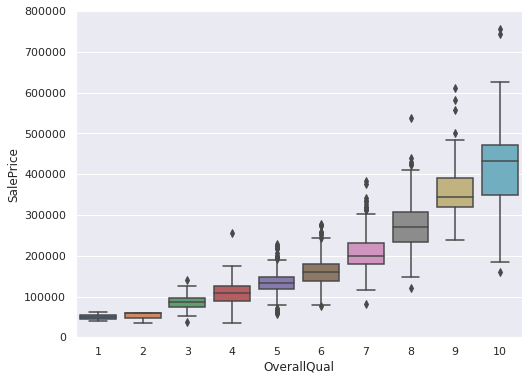

In [96]:
# OverallQual: 주택 전반적인 자질에 대한 평가 점수, SalePrice: 주택의 판매 가격의 BoxPlot
var='OverallQual'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# 가로 8인치, 세로 6인치 크기의 새로운 Figure 객체와 이에 속하는 Axes 객체를 생성
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

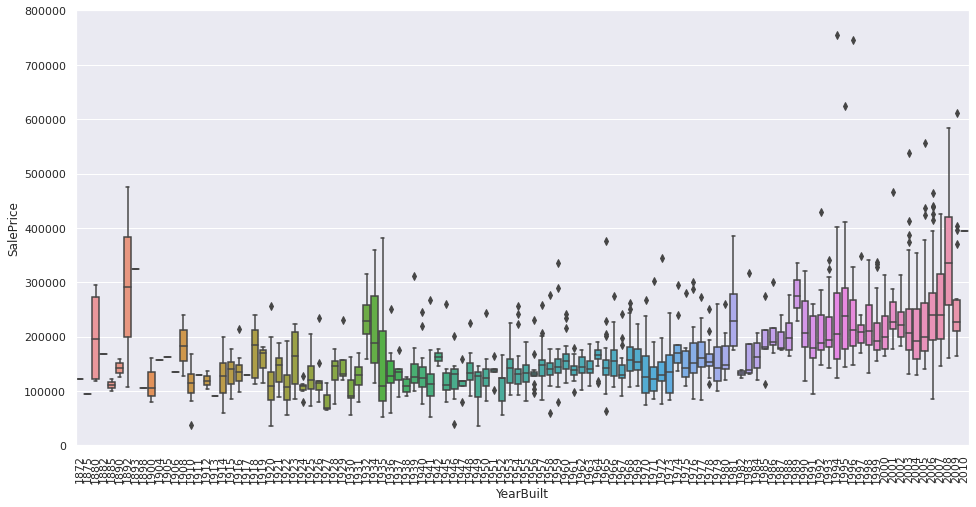

In [97]:
# YearBuilt: 주택 건축 년도,  SalePrice: 주택의 판매 가격의 BoxPlot
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

# x축 눈금(label)을 90도 회전
plt.xticks(rotation=90);

<Axes: >

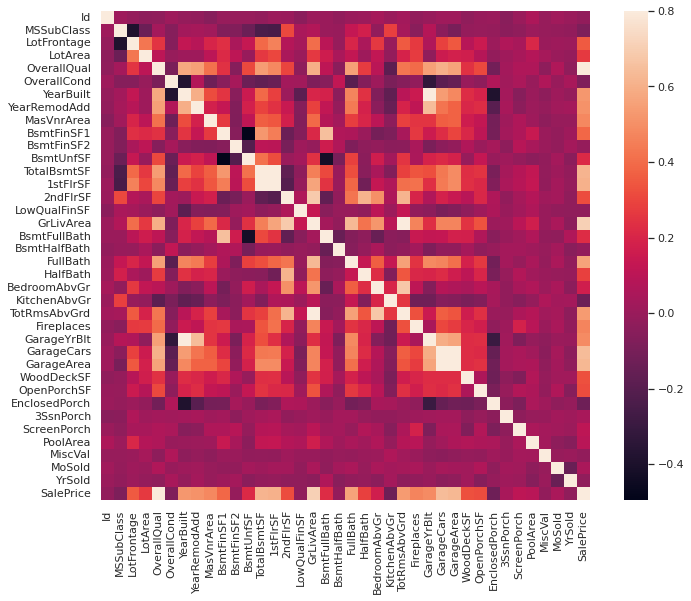

In [98]:
# correlation matrix
corrmat=df_train.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True) #'vmax' 인자는 색상 맵의 최대값

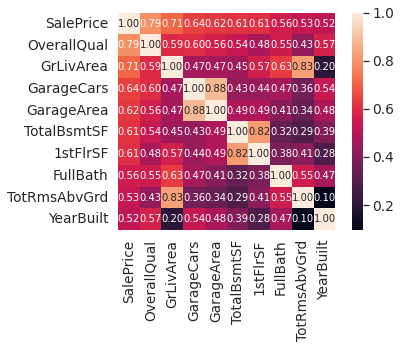

In [99]:
# saleprice correlation matrix
k=10
cols=corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # 상위 10개
cm= np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

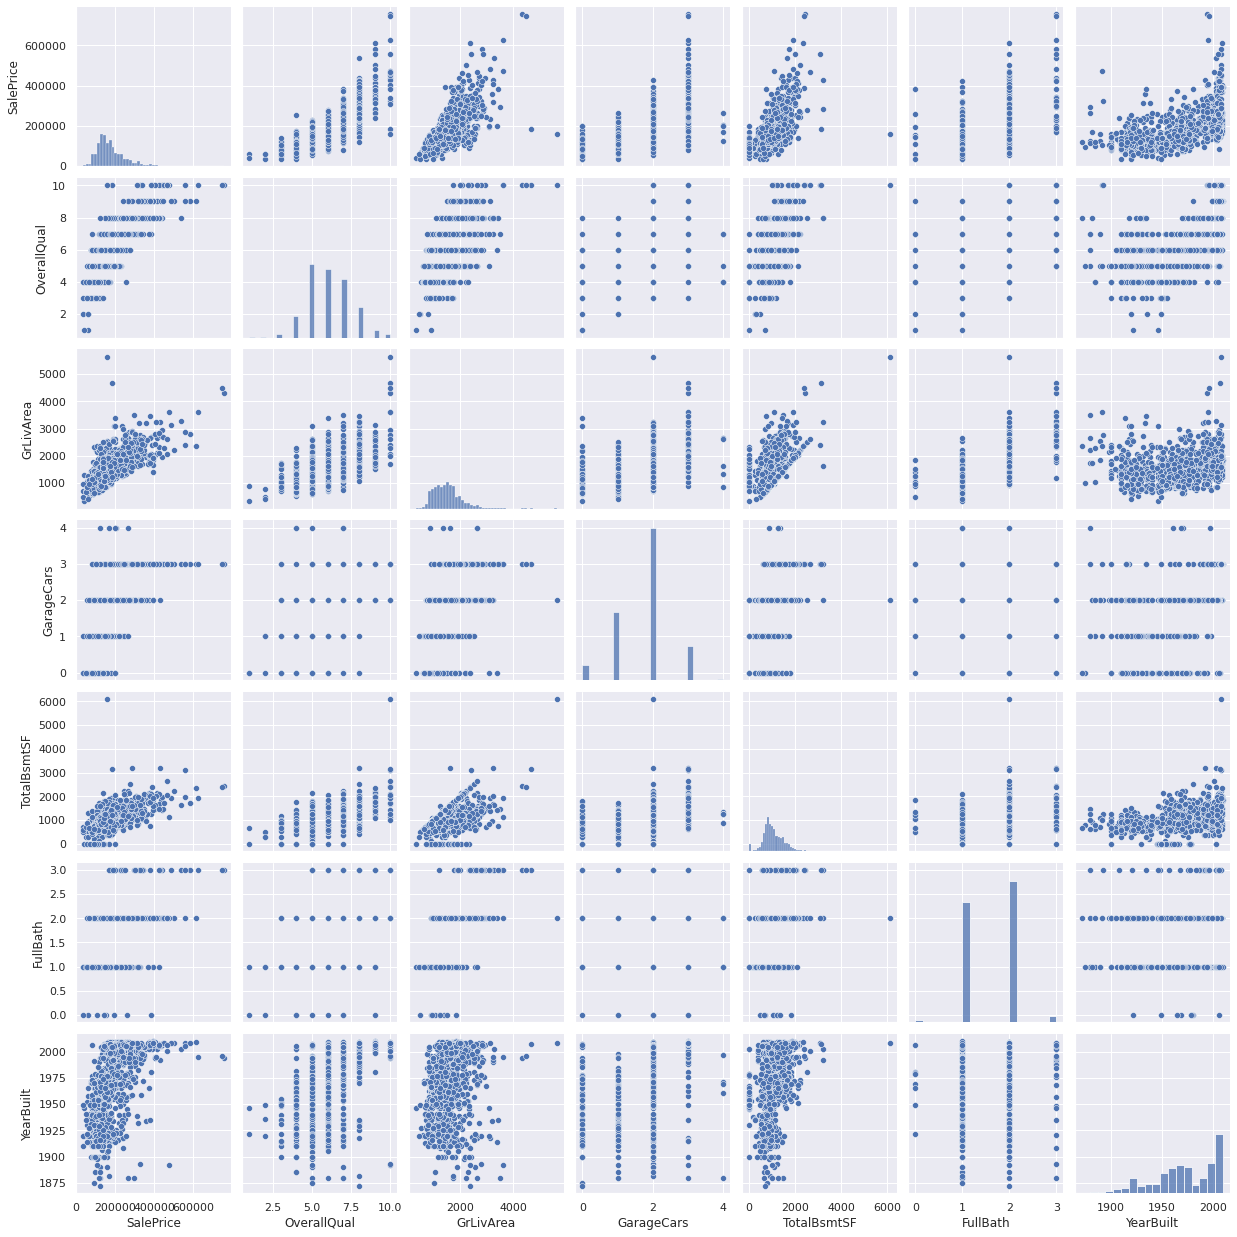

In [100]:
# scatterplot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
#데이터 프레임의 모든 숫자형 열들 간의 산점도와 히스토그램을 한번에 그려주는 기능
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [101]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [102]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [103]:
df_train.isnull().sum().max()

0

In [104]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [105]:
# Standardizing data
# 주택가격 표준화 작업

# saleprice_scaled 변수에는 'SalePrice' 컬럼값을 표준화한 값들이 2차원 배열 형태로 저장
saleprice_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

# SalePrice' 컬럼값 중 가장 작은 10개
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
#SalePrice' 컬럼값 중 가장 큰 10개
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print()
print('outer range (high) of thr distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of thr distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [106]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

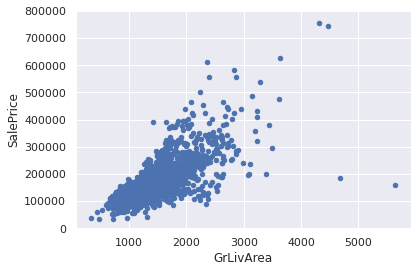

In [107]:
#  GrLivArea: 지상 생활 면적, ,SalePrice: 주택의 판매 가격의 산점도
var='GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [108]:
# 이상치 제거
df_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [109]:
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

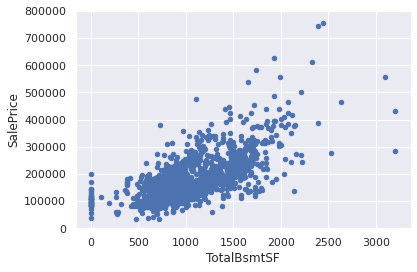

In [110]:
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

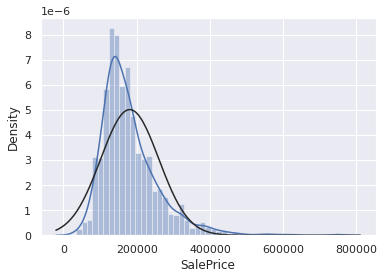

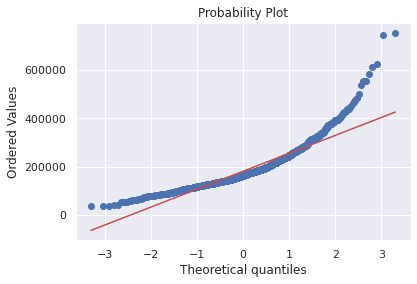

In [111]:
# 데이터 정규분포인지 확인
# histogram and normal probability plot

# 데이터의 히스토그램과 커널 밀도 추정 값을 함께 표시할 수 있으며
# 각각의 세부 요소들을 조정할 수 있는 파라미터를 제공
sns.distplot(df_train['SalePrice'], fit=norm) #'fit' 파라미터를 사용하여 분포 곡선을 추가
fig=plt.figure()

res=stats.probplot(df_train['SalePrice'], plot=plt)
# 정규분포를 따르지 않음

In [112]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [113]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

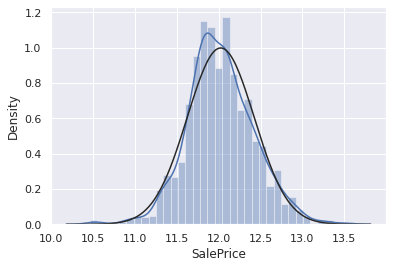

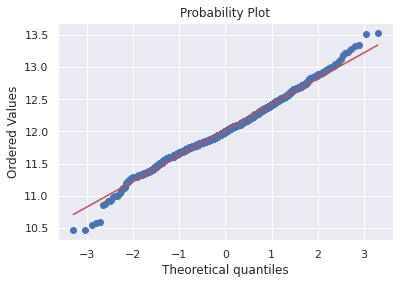

In [114]:
# transformation histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

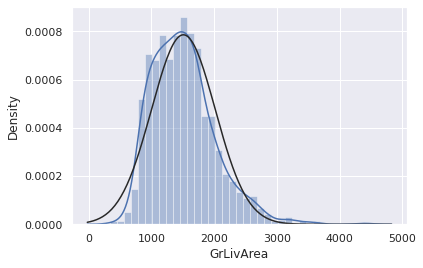

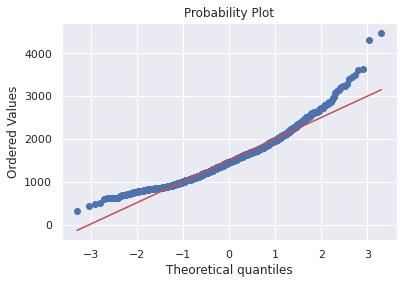

In [115]:
# GrLivArea: 지상 생활 면적 데이터 정규분포 확인
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [116]:
# data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

In [117]:
df_train['GrLivArea']

0       7.444249
1       7.140453
2       7.487734
3       7.448334
4       7.695303
          ...   
1455    7.406711
1456    7.636752
1457    7.757906
1458    6.982863
1459    7.135687
Name: GrLivArea, Length: 1457, dtype: float64

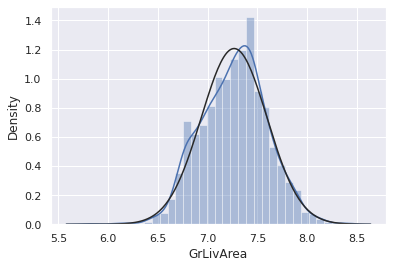

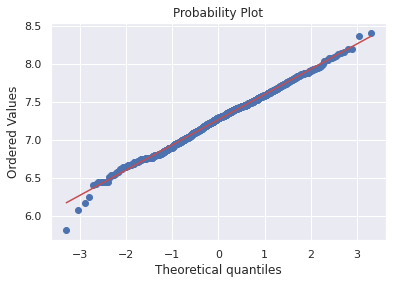

In [118]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

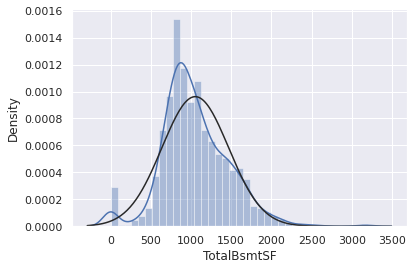

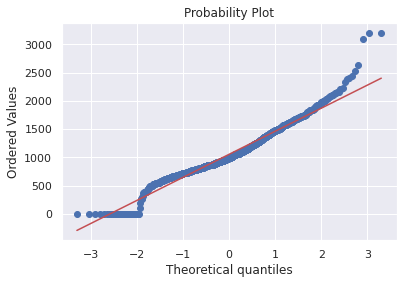

In [119]:
# TotalBsmtSF:지하실 총 면적 데이터 정규분포 확인
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'], plot=plt)

# 0값은 로그변환을 할 수 없음
# 지하실 여부로 변환 후 로그 변환

In [120]:
# create columns for new variable
# (one is enough because it's a binary categorical feature)
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt']=0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [121]:
#df_train[df_train['HasBsmt']==0]

In [123]:
# transform data
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

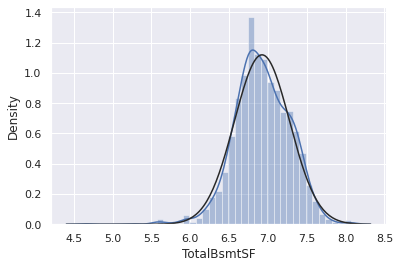

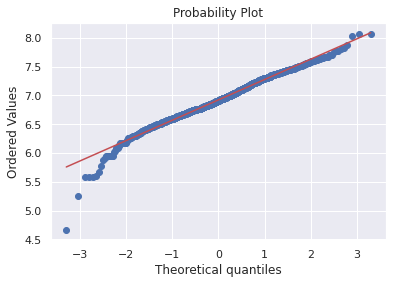

In [124]:
# histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

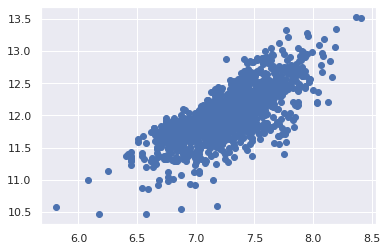

In [125]:
# scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

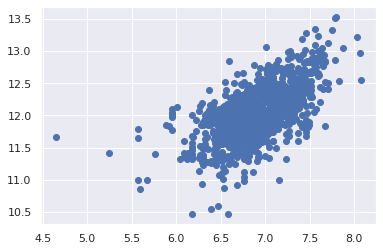

In [127]:
# scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'],
            df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'])

In [128]:
# 이진형 더미 변수로 구성된 데이터프레임으로 변경
# convert categorocal variable into dummy
df_train = pd.get_dummies(df_train)

In [129]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
